In [ ]:
!pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.1 MB/s eta 0:00:00


In [ ]:
!pip install scipy==1.11.4
!pip install table-evaluator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 39.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.6/821.6 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 27.

In [ ]:
import pandas as pd
from ctgan import CTGAN
from collections import Counter
import matplotlib.pyplot as plt
from table_evaluator import TableEvaluator

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CleanedDataset/y_train.csv')

In [ ]:
train_data = X_train.copy()
train_data['Reason of Failure'] = y_train

## Class Distribution Before Data Augmentation

In [ ]:
class_counts = Counter(y_train['Reason of Failure'])
class_counts

Counter({0: 6747, 6: 32, 3: 90, 2: 62, 4: 56, 5: 11, 1: 2})

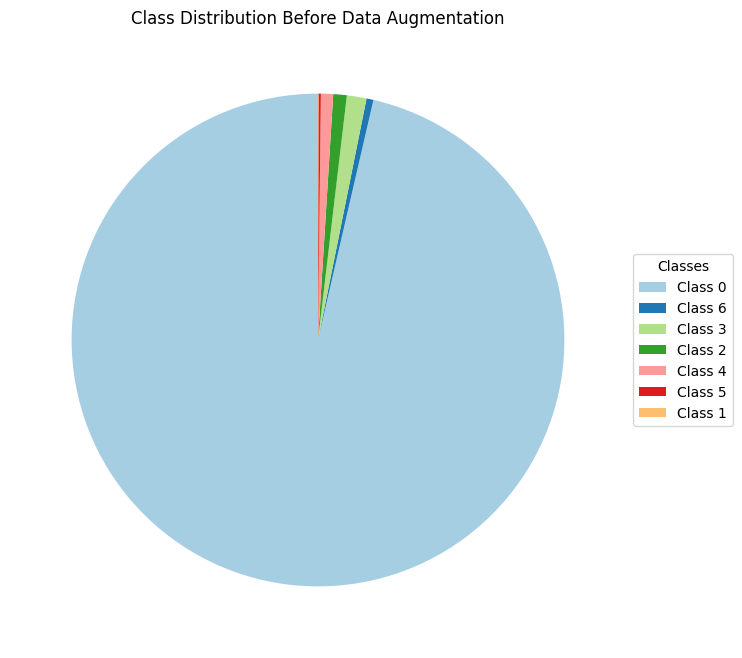

In [ ]:
labels = [f"Class {cls}" for cls in class_counts.keys()]
sizes = class_counts.values()

plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sizes, labels=None, startangle=90, colors=plt.cm.Paired.colors)
plt.legend(wedges, labels, title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Class Distribution Before Data Augmentation")
plt.show()

In [ ]:
max_class_size = max(class_counts.values())
max_class_size

6747

## Applying CTGAN

In [ ]:
augmented_data = []

In [ ]:
ctgan = CTGAN(verbose=True)

In [ ]:
for class_label in class_counts.keys():
    class_data = train_data[train_data['Reason of Failure'] == class_label]
    ctgan.fit(class_data, epochs=500)
    synthetic_class_data = ctgan.sample(max_class_size - len(class_data))
    augmented_data.append(synthetic_class_data)

Gen. (-1.10) | Discrim. (-0.01): 100%|██████████| 500/500 [07:30<00:00,  1.11it/s]
Gen. (-0.44) | Discrim. (-0.09): 100%|██████████| 500/500 [00:31<00:00, 15.70it/s]
Gen. (-1.55) | Discrim. (-0.24): 100%|██████████| 500/500 [00:33<00:00, 15.14it/s]
Gen. (-0.01) | Discrim. (-0.06): 100%|██████████| 500/500 [00:32<00:00, 15.43it/s]
Gen. (-2.15) | Discrim. (0.04): 100%|██████████| 500/500 [00:37<00:00, 13.20it/s]
Gen. (-0.78) | Discrim. (-0.12): 100%|██████████| 500/500 [00:31<00:00, 15.96it/s]
Gen. (0.30) | Discrim. (-0.21): 100%|██████████| 500/500 [00:31<00:00, 15.94it/s]


In [ ]:
balanced_data = pd.concat([train_data] + augmented_data)

In [ ]:
X_balanced = balanced_data.drop(columns=['Reason of Failure'])
y_balanced = balanced_data['Reason of Failure']

In [ ]:
print(y_balanced.value_counts())

Reason of Failure
0    6747
6    6747
3    6747
2    6747
4    6747
5    6747
1    6747
Name: count, dtype: int64


In [ ]:
class_counts_after_ctgan = Counter(y_balanced)
class_counts_after_ctgan

Counter({0: 6747, 6: 6747, 3: 6747, 2: 6747, 4: 6747, 5: 6747, 1: 6747})

## Class Distribution After Data Augmentation

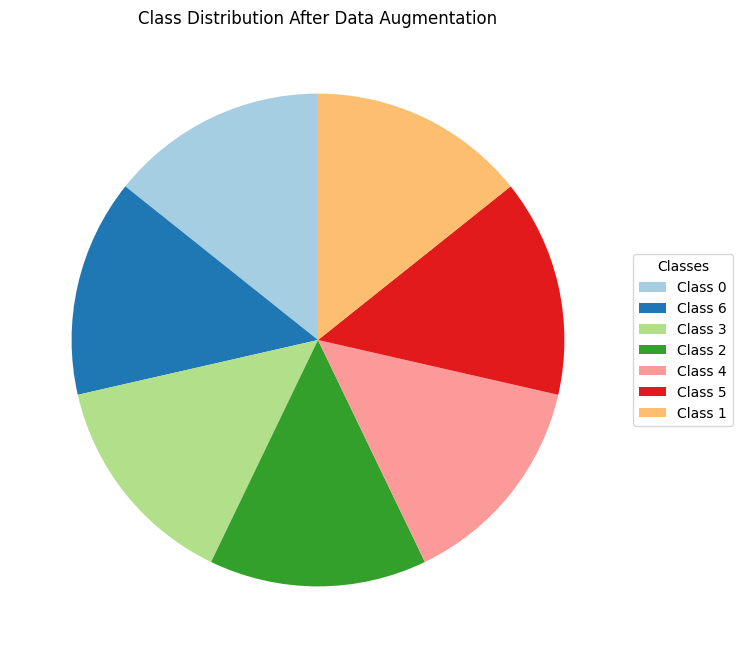

In [ ]:
labels = [f"Class {cls}" for cls in class_counts.keys()]
sizes = class_counts_after_ctgan.values()

plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sizes, labels=None, startangle=90, colors=plt.cm.Paired.colors)
plt.legend(wedges, labels, title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Class Distribution After Data Augmentation")
plt.show()

In [ ]:
X_balanced

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,-1.4024,-1.2170,0.7766,-1.1925,0.3935
1,2,-0.3524,-0.5430,-1.1422,0.6333,-1.2090
2,2,0.2475,1.3443,-1.5383,2.0879,0.5978
3,1,-0.8524,-1.1496,-0.5287,0.3825,1.0691
4,1,1.9474,1.9509,-0.0713,0.2521,1.3519
...,...,...,...,...,...,...
6740,1,0.8935,0.2838,-1.9605,3.0666,0.5047
6741,1,0.1507,-0.2587,-2.0000,2.7820,0.8098
6742,0,0.6075,0.4912,-1.9621,3.1225,0.4425
6743,0,1.3349,0.6628,-1.9232,3.5292,0.5209


In [ ]:
y_balanced

,Reason of Failure
0,0
1,0
2,0
3,0
4,0
...,...
6740,1
6741,1
6742,1
6743,1


## Evaluation of Synthetic Data against Real Data

In [ ]:
table_evaluator = TableEvaluator(train_data, balanced_data.sample(7000, random_state=42))

In [ ]:
table_evaluator.evaluate(target_col='Reason of Failure')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[                             f1_real  f1_fake  jaccard_similarity
index                                                            
LogisticRegression_real       0.9800   0.3879              0.2351
LogisticRegression_fake       0.2671   0.7043              0.1391
RandomForestClassifier_real   0.9764   0.7736              0.6213
RandomForestClassifier_fake   0.2664   0.8836              0.1508
DecisionTreeClassifier_real   0.9750   0.6636              0.4981
DecisionTreeClassifier_fake   0.3457   0.8143              0.1991
MLPClassifier_real            0.9793   0.7900              0.6657
MLPClassifier_fake            0.3557   0.8986              0.2222]

Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.3457   0.8143              0.1991
DecisionTreeClassifier_real   0.9750   0.6636              0.4981
LogisticRegression_

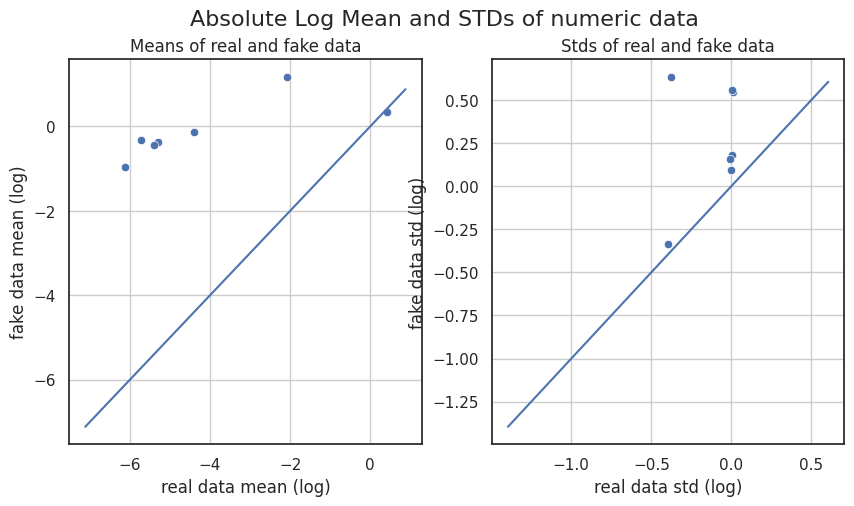

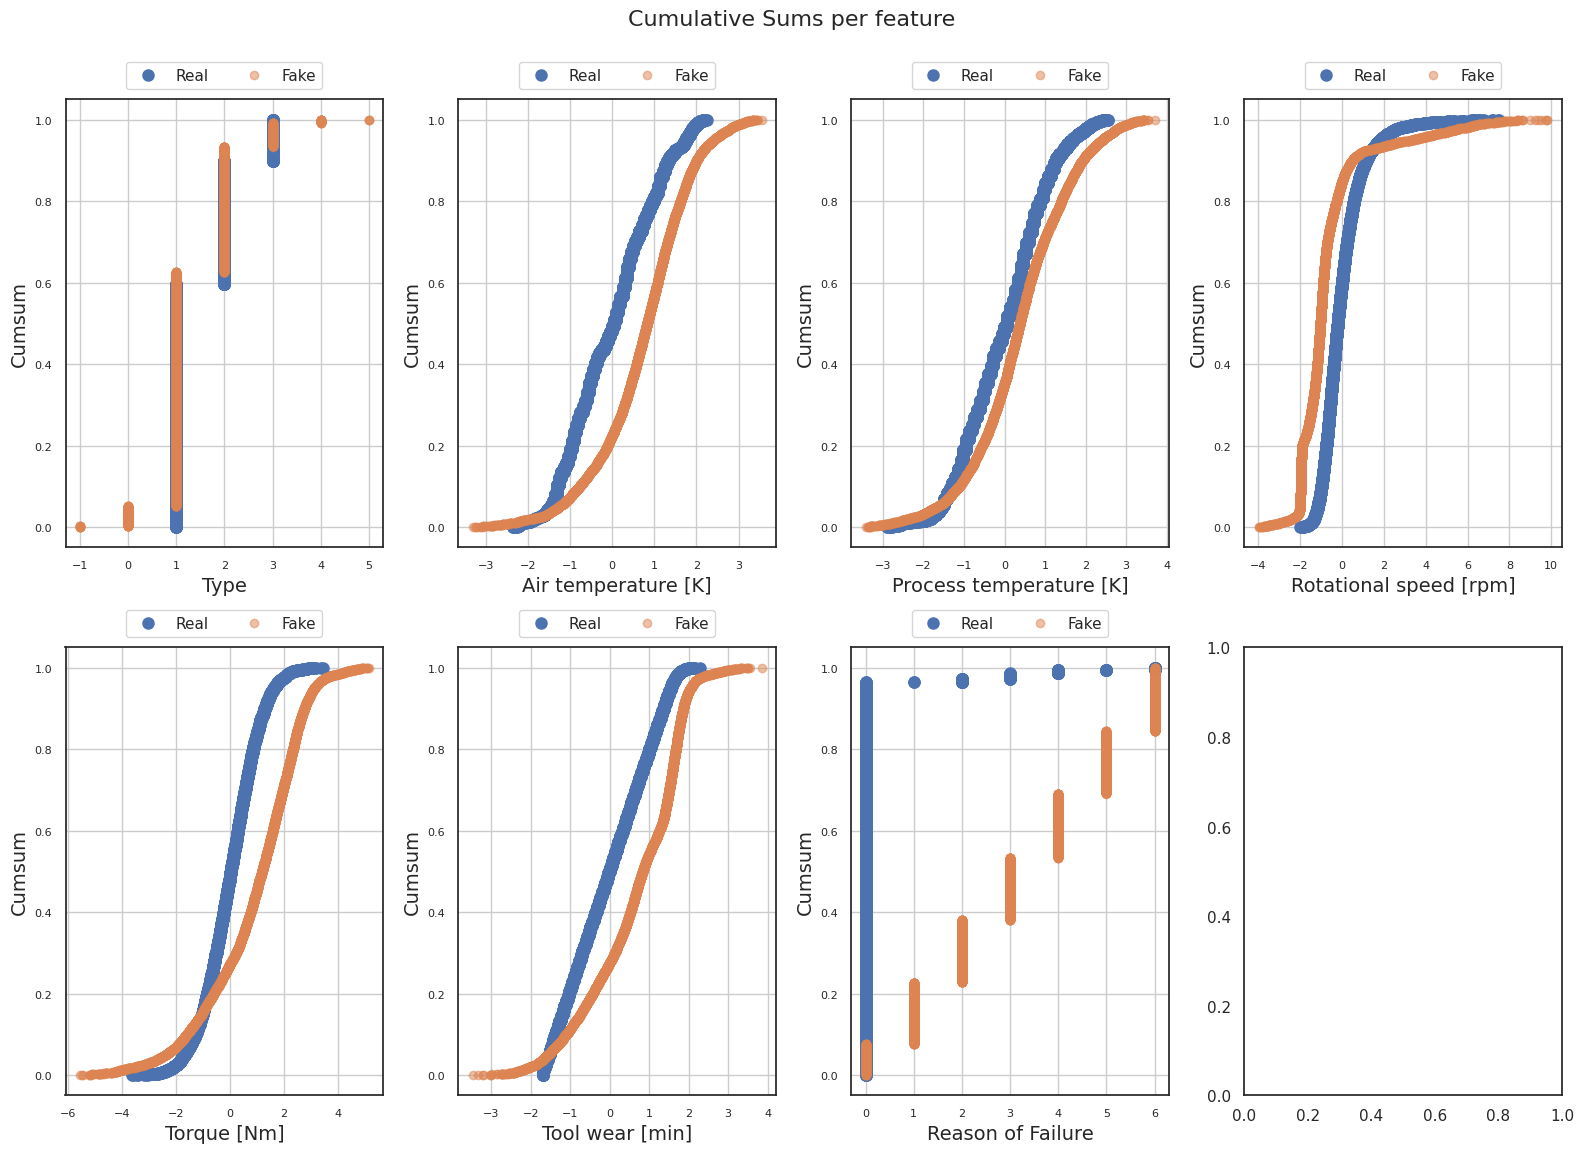

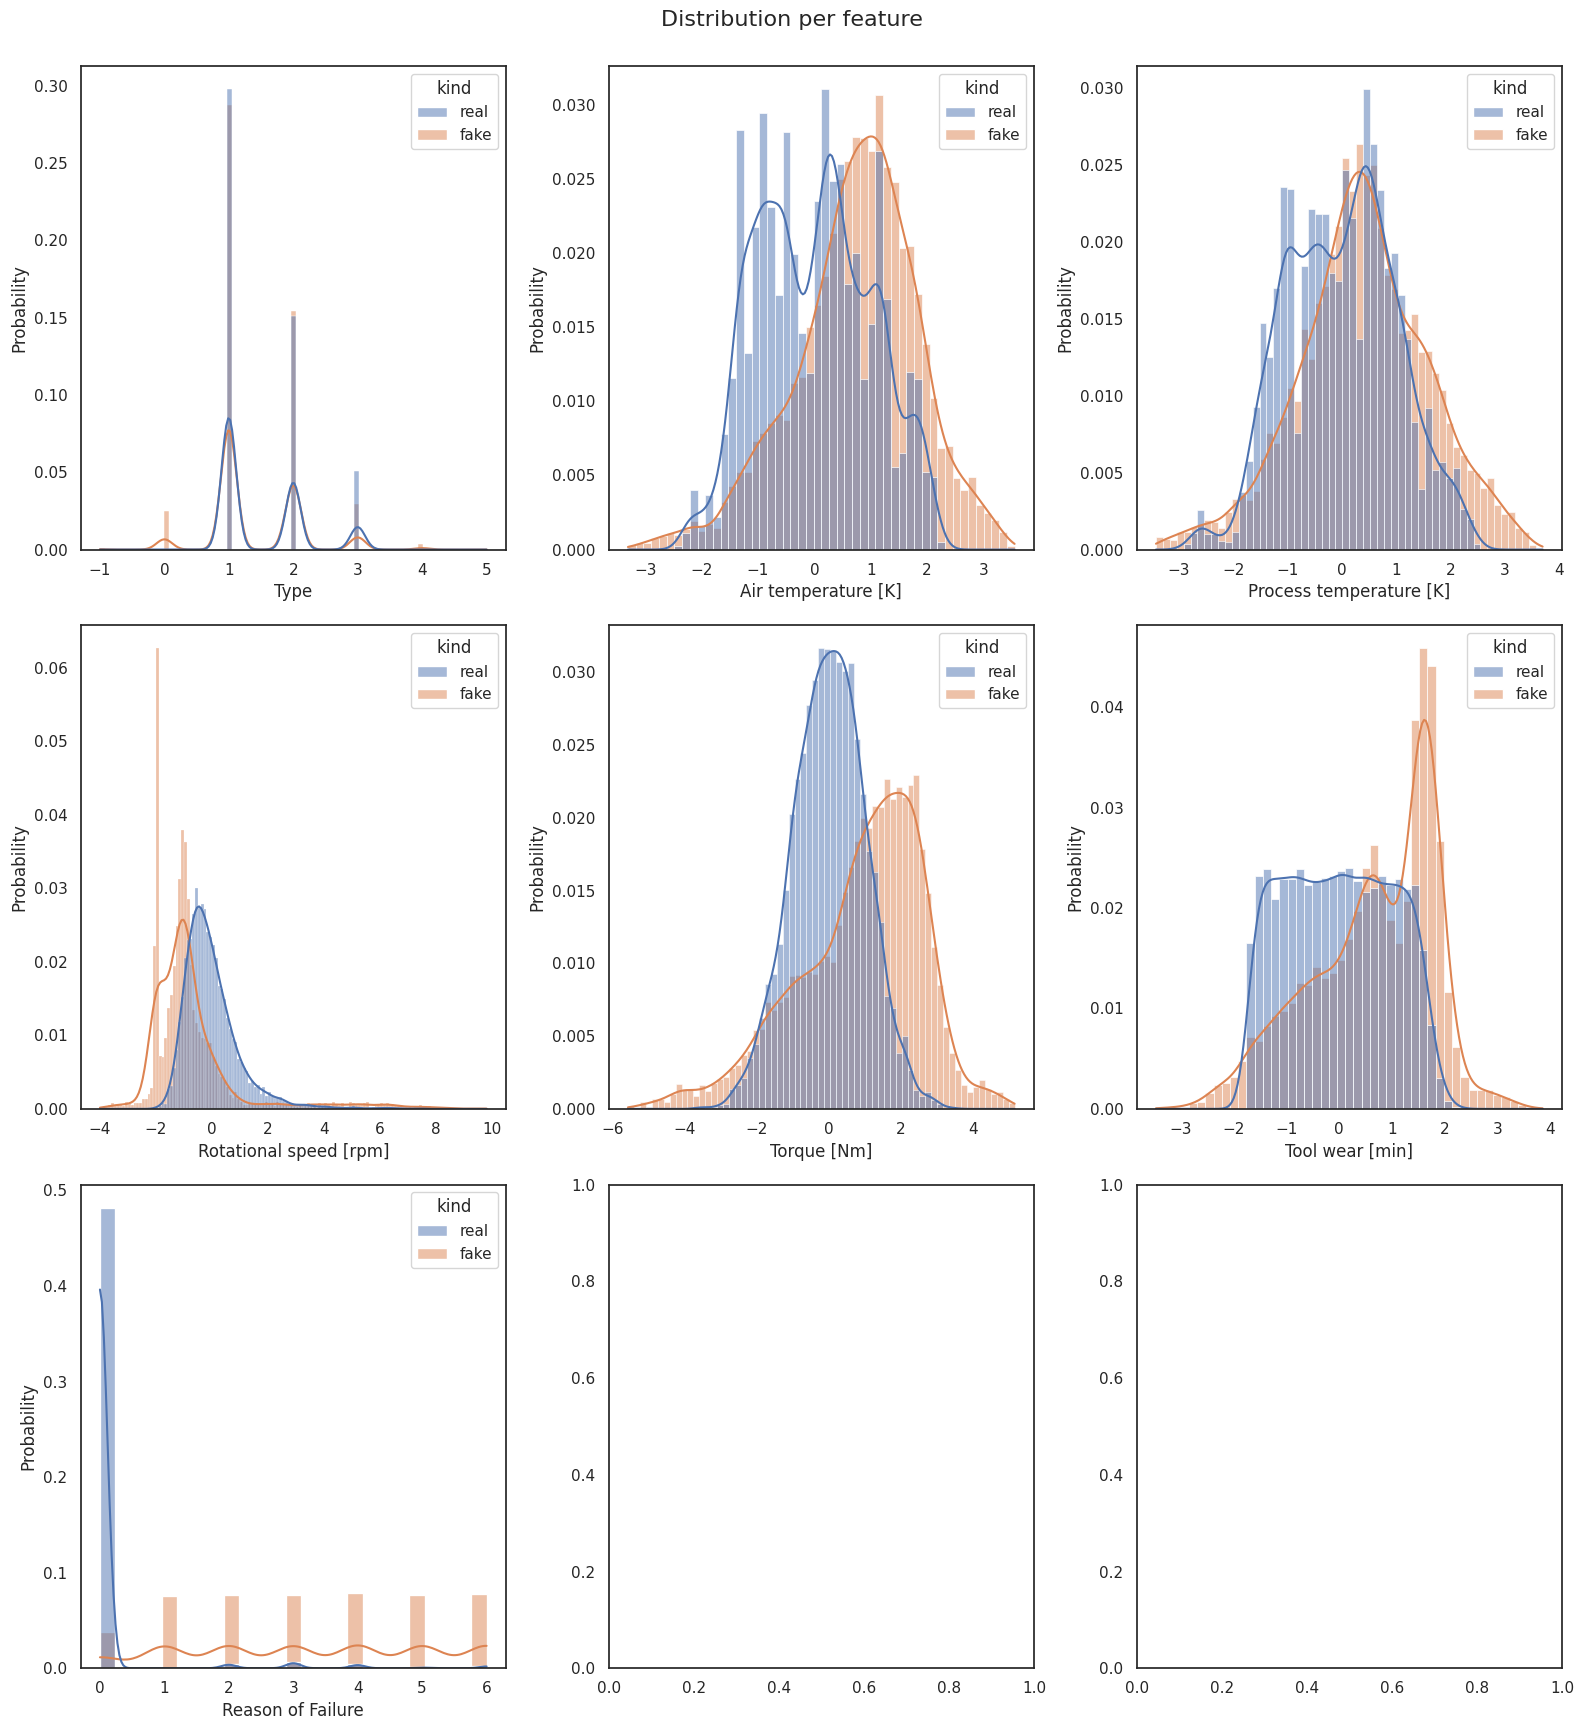

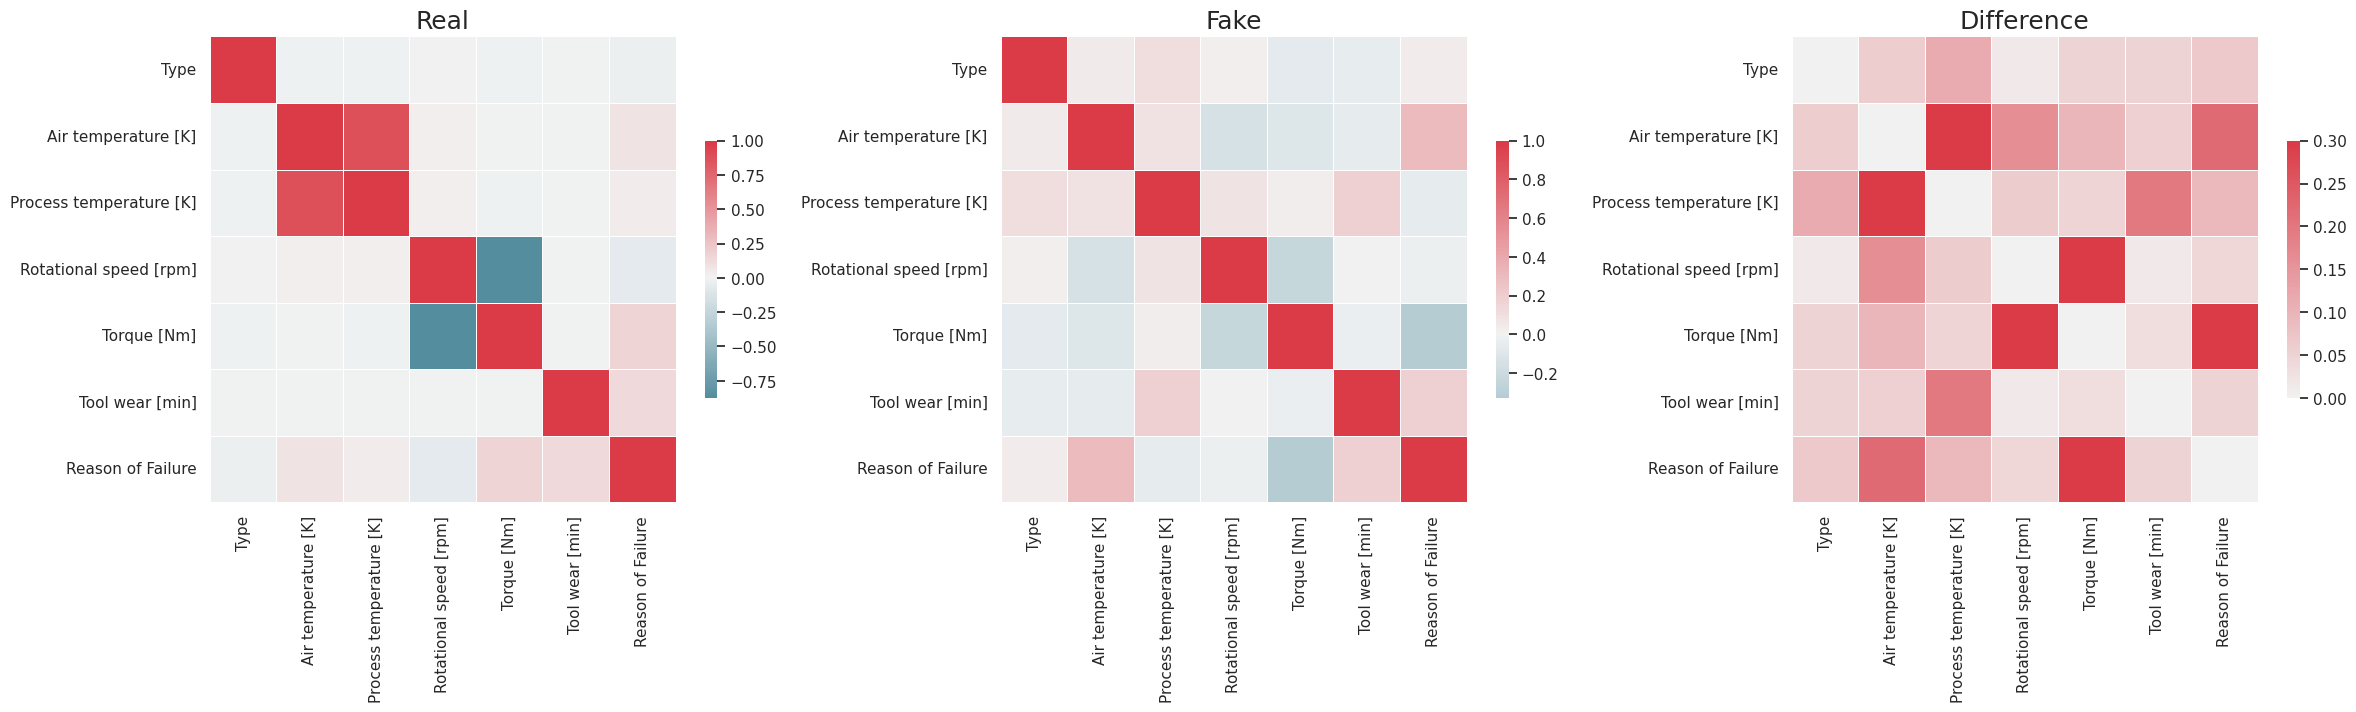

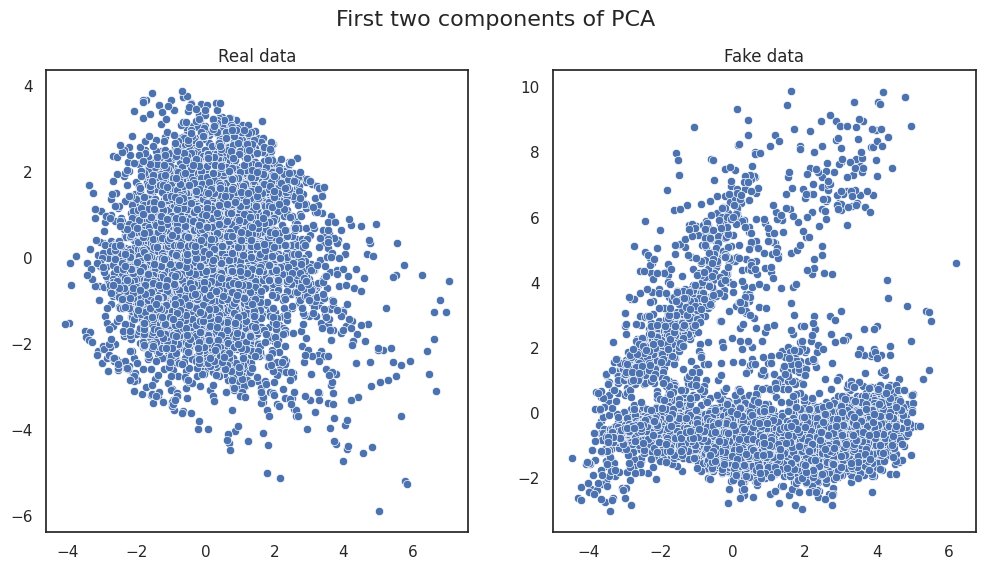

In [ ]:
table_evaluator.visual_evaluation()

## Saving CSV files

In [ ]:
X_balanced.to_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CTGAN_AugmentedDataset/X_train_ctgan.csv', index = False)
y_balanced.to_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CTGAN_AugmentedDataset/y_train_ctgan.csv', index = False)